# Lab 12: Applying DBSCAN for Semantic Text Clustering with Sentence Embeddings and GenAI

## Notebook Summary

> The notebook further explores the concept of data augmentation by adding new, semantically related sentences to the original corpus. It then repeats the embedding, reduction, and clustering process. This final step effectively demonstrates how enriching the dataset can help solidify the clusters, leading to a more robust and well-defined grouping of the text data. The final output, which lists the members of each cluster, provides a clear and interpretable result of the entire semantic analysis pipeline.

This notebook provides a comprehensive, hands-on demonstration of a modern natural language processing workflow for semantic text clustering. The primary objective is to group a collection of sentences into thematic clusters based on their meaning, rather than just keyword matching. To achieve this, it leverages a powerful combination of sentence embeddings to represent text numerically, UMAP for dimensionality reduction, and the DBSCAN algorithm for density-based clustering.

The analysis begins by introducing the core clustering algorithm, DBSCAN, using a classic synthetic "moons" dataset. This initial step serves to intuitively demonstrate DBSCAN's key advantage: its ability to identify non-linear, arbitrarily shaped clusters, which is a common scenario in complex data like text embeddings. This contrasts with algorithms like K-Means, which assume clusters are convex or spherical. By visualizing DBSCAN's effectiveness on this simple 2D dataset, the notebook establishes a solid foundation before applying the technique to the more abstract domain of text.

The core of the notebook involves transforming a small corpus of text into a format suitable for clustering. This is accomplished using a pre-trained model from the `sentence-transformers` library, which generates high-dimensional vector representations (embeddings) for each sentence. The fundamental principle is that sentences with similar meanings will have embeddings that are close to each other in the high-dimensional vector space. Because working in hundreds of dimensions is computationally intensive and difficult to visualize, the notebook then applies UMAP (Uniform Manifold Approximation and Projection) to reduce the dimensionality of these embeddings down to two. UMAP is an excellent choice for this task as it excels at preserving the local and global structure of the data, ensuring that the relationships between sentences are maintained in the lower-dimensional space.

Finally, with the text data represented as points in a 2D plane, DBSCAN is applied to identify clusters. The resulting scatter plot provides a clear visualization of the thematic groups, with each point annotated with its original text. The notebook further explores the concept of data augmentation by adding new, semantically related sentences to the original corpus. It then repeats the embedding, reduction, and clustering process. This final step effectively demonstrates how enriching the dataset can help solidify the clusters, leading to a more robust and well-defined grouping of the text data. The final output, which lists the members of each cluster, provides a clear and interpretable result of the entire semantic analysis pipeline.


## Step 1: Install Required Libraries 

```bash
!pip install -q sentence-transformers umap-learn 
```

## Step 2: DBSCAN on Synthetic Data (Moons Example) 

In [1]:
from sklearn.datasets import make_moons 
from sklearn.cluster import DBSCAN 
import matplotlib.pyplot as plt 
import numpy as np

In [2]:
# Generate synthetic data 
X, _ = make_moons(n_samples=300, noise=0.1) 

In [3]:
# Apply DBSCAN 
db = DBSCAN(eps=0.2, min_samples=5).fit(X) 
labels = db.labels_ 

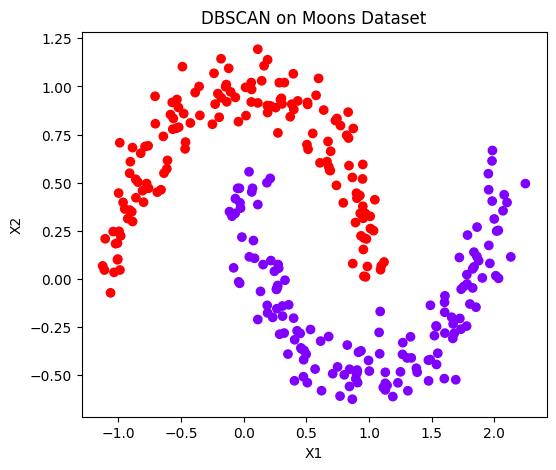

In [4]:
# Visualize the clusters 
plt.figure(figsize=(6, 5)) 
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='rainbow') 
plt.title("DBSCAN on Moons Dataset") 
plt.xlabel("X1") 
plt.ylabel("X2") 
plt.show() 

## Step 3: Clustering Text with GenAI (Sentence Embeddings)

- As usual we will use the `gemini` series model to generate embeddings. 
- Let's use this: https://ai.google.dev/gemini-api/docs/embeddings

In [13]:
from sentence_transformers import SentenceTransformer 

# Load Sentence Transformer model 
model = SentenceTransformer('all-MiniLM-L6-v2')

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

c:\Users\Khor Kean Teng\AppData\Local\Programs\Python\Python312\Lib\site-packages\huggingface_hub\file_download.py:142: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\Khor Kean Teng\.cache\huggingface\hub\models--sentence-transformers--all-MiniLM-L6-v2. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.5k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [14]:
texts = [ 
"AI in healthcare is transforming diagnosis", 
"Self-driving cars are using deep learning", 
"The stock market saw a sharp increase", 
"Deep learning revolutionizes many industries", 
"Investment in tech companies is growing", 
"New drugs are being discovered with AI" 
] 

In [27]:
# Generate embeddings 
embeddings = model.encode(texts) 

## Step 4: Dimensionality Reduction using UMAP 

In [28]:
import umap.umap_ as umap 
reducer = umap.UMAP(n_neighbors=5, min_dist=0.3, metric='cosine') 
reduced_embeddings = reducer.fit_transform(embeddings) 

c:\Users\Khor Kean Teng\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


## Step 5: DBSCAN on Reduced Embeddings

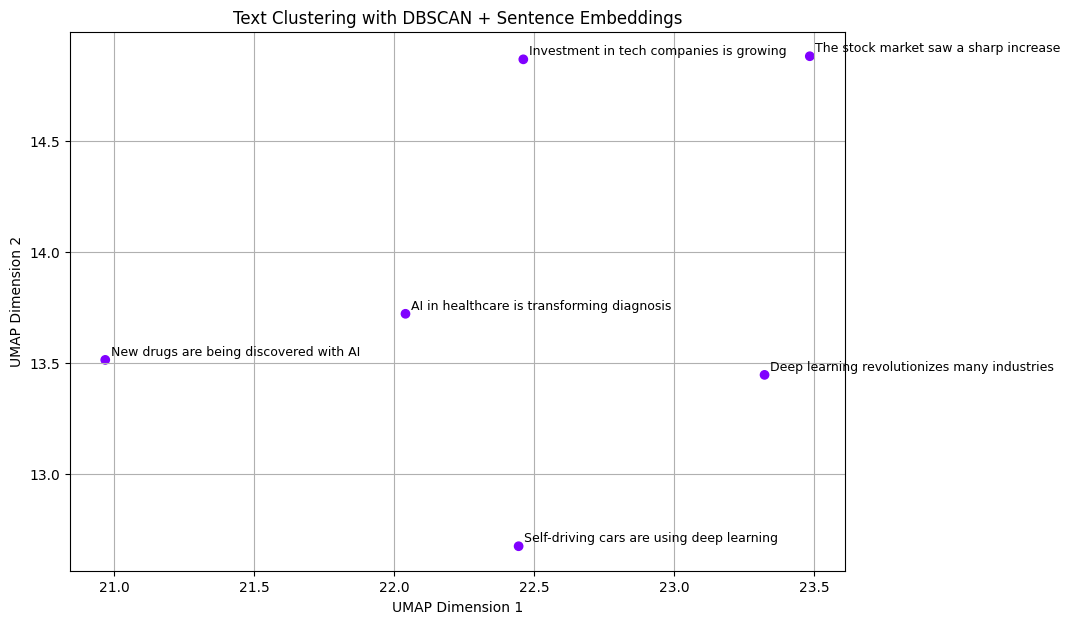

In [29]:
from sklearn.cluster import DBSCAN 

# Run DBSCAN 
cluster = DBSCAN(eps=1.0, min_samples=2).fit(reduced_embeddings) 
labels = cluster.labels_ 
plt.figure(figsize=(10, 7)) 

# Plot points 
plt.scatter(reduced_embeddings[:, 0], reduced_embeddings[:, 1], c=labels, 
cmap='rainbow') 

# Safely add text labels 
for i in range(min(len(reduced_embeddings), len(texts))): 
    x, y = reduced_embeddings[i] 
    plt.text(x + 0.02, y + 0.02, texts[i], fontsize=9) 
plt.title("Text Clustering with DBSCAN + Sentence Embeddings") 
plt.xlabel("UMAP Dimension 1") 
plt.ylabel("UMAP Dimension 2") 
plt.grid(True) 
plt.show()

## Step 6: DBSCAN after GenAI Text Augmentation 

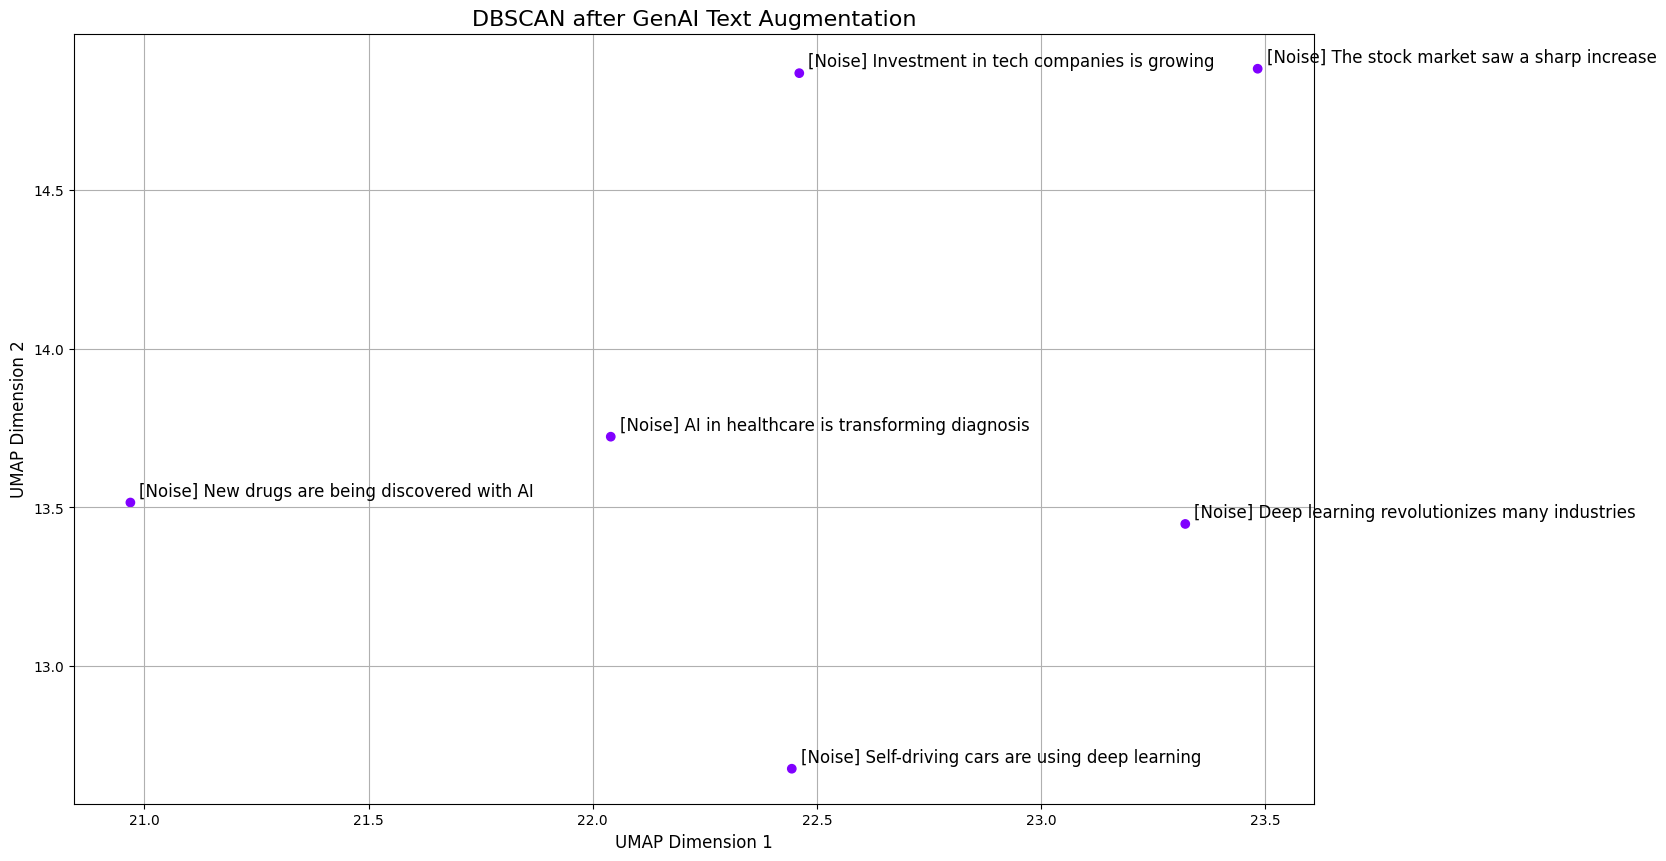

In [30]:
plt.figure(figsize=(16, 10)) 
plt.scatter(reduced_embeddings[:, 0], reduced_embeddings[:, 1], c=labels, 
cmap='rainbow') 
texts_augmented = texts 

for i in range(min(len(reduced_embeddings), len(texts_augmented))): 
    x, y = reduced_embeddings[i] 
    label = labels[i] 
    label_text = f"[{label}] {texts_augmented[i]}" if label != -1 else f"[Noise] {texts_augmented[i]}"
    plt.text(x + 0.02, y + 0.02, label_text, fontsize=12) 
plt.title("DBSCAN after GenAI Text Augmentation", fontsize=16) 
plt.xlabel("UMAP Dimension 1", fontsize=12) 
plt.ylabel("UMAP Dimension 2", fontsize=12) 
plt.grid(True) 
plt.show() 

In [31]:
for i, text in enumerate(texts): 
    print(f"Cluster {labels[i]}: {text}") 

Cluster -1: AI in healthcare is transforming diagnosis
Cluster -1: Self-driving cars are using deep learning
Cluster -1: The stock market saw a sharp increase
Cluster -1: Deep learning revolutionizes many industries
Cluster -1: Investment in tech companies is growing
Cluster -1: New drugs are being discovered with AI


## Step 7: DBSCAN after GenAI Text Augmentation 

c:\Users\Khor Kean Teng\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


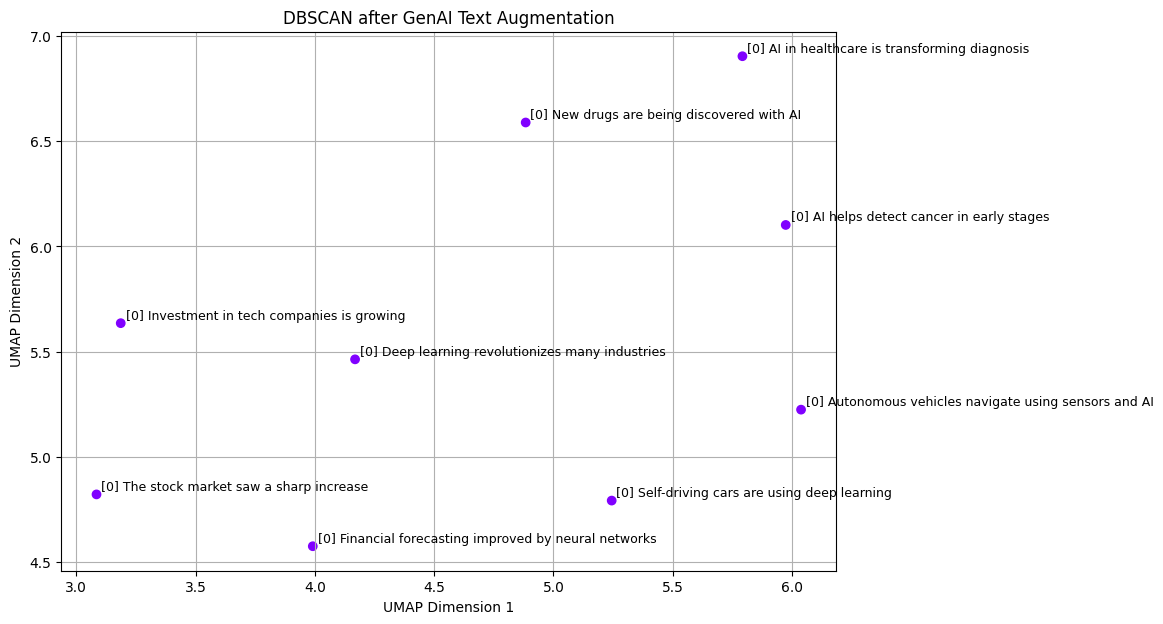

In [33]:
# Add synthetic text samples 
synthetic_texts = [ 
"AI helps detect cancer in early stages", 
"Autonomous vehicles navigate using sensors and AI", 
"Financial forecasting improved by neural networks" 
] 

# Combine original and synthetic texts 
texts_augmented = texts + synthetic_texts 

# Embed and cluster again (reuse previous steps) 
embeddings = model.encode(texts_augmented)
reduced_embeddings = reducer.fit_transform(embeddings) 
cluster = DBSCAN(eps=2.0, min_samples=2).fit(reduced_embeddings) 
labels = cluster.labels_ 
plt.figure(figsize=(10, 7)) 
plt.scatter(reduced_embeddings[:, 0], reduced_embeddings[:, 1], c=labels, cmap='rainbow') 

# Annotate each point with its cluster label or [Noise] 
for i in range(min(len(reduced_embeddings), len(texts_augmented))): 
    x, y = reduced_embeddings[i] 
    label = labels[i] 
    label_text = f"[{label}] {texts_augmented[i]}" if label != -1 else f"[Noise] {texts_augmented[i]}" 
    plt.text(x + 0.02, y + 0.02, label_text, fontsize=9) 
plt.title("DBSCAN after GenAI Text Augmentation") 
plt.xlabel("UMAP Dimension 1") 
plt.ylabel("UMAP Dimension 2") 
plt.grid(True) 
plt.show()

In [34]:
for cluster_id in set(labels): 
    print(f"\nCluster {cluster_id}") 
    
for i, label in enumerate(labels): 
    if label == cluster_id: 
        print(f" - {texts_augmented[i]}") 


Cluster 0
 - AI in healthcare is transforming diagnosis
 - Self-driving cars are using deep learning
 - The stock market saw a sharp increase
 - Deep learning revolutionizes many industries
 - Investment in tech companies is growing
 - New drugs are being discovered with AI
 - AI helps detect cancer in early stages
 - Autonomous vehicles navigate using sensors and AI
 - Financial forecasting improved by neural networks
